In [150]:
import numpy as np
import scipy as sp
from scipy.spatial.distance import euclidean as euclidean_dist
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

#Question 1
We wish to cluster the following set of points: 

In [151]:
from IPython.display import Image
Image(url='https://d396qusza40orc.cloudfront.net/mmds/images/otc_gold.gif')

 into 10 clusters. We initially choose each of the green points (25,125), (44,105), (29,97), (35,63), (55,63), (42,57), (23,40), (64,37), (33,22), and (55,20) as a centroid. Assign each of the gold points to their nearest centroid. (Note: the scales of the horizontal and vertical axes differ, so you really need to apply the formula for distance of points; you can't just "eyeball" it.) Then, recompute the centroids of each of the clusters. Do any of the points then get reassigned to a new cluster on the next round? Identify the true statement in the list below. Each statement refers either to a centroid AFTER recomputation of centroids (precise to one decimal place) or to a point that gets reclassified.
* There is a centroid after recomputation at (56,70.3)
* There is a centroid after recomputation at (50.3,116.3)
* There is a centroid after recomputation at (34.3,133.3)
* There is a centroid after recomputation at (55,20)


In [152]:
points = np.array([(25,125), (44,105), (29,97), (35,63), (55,63), (42,57), (23,40), (64,37), (33,22), (55,20),
          (50,30), (50,60), (28,145), (65,140), (50,130), (38,115), (55,118), (50,90), (43,83), (63,88)])
centroid_0 = np.array([(25,125), (44,105), (29,97), (35,63), (55,63), (42,57), (23,40), (64,37), (33,22), (55,20)])

In [153]:
def euclid_dist(point):    
    return np.sqrt(np.sum(point**2))

In [154]:
centroid = centroid_0
dist_func = np.vectorize(euclidean_dist)
def iter_clust(points, centroid):
    data_dist = []
    clusters = defaultdict(list)
    for i in range(points.shape[0]):
        data_dist.append(dist_func(points[i], centroid))
    data_dist=np.array(data_dist)
    data_dist = np.apply_along_axis(euclid_dist, 2, data_dist) # distance each point to each centroid
    for i in range(points.shape[0]):
        clusters[np.argmin(data_dist[i])].append(points[i])
    
    centroid_new = {}
    for i in range(centroid.shape[0]):
        centroid_new[i] = np.mean(clusters[i], axis=0)
    return centroid_new

In [155]:
centroid_1_iter = iter_clust(points, centroid)
print('Centroid after 1 iteration:',centroid_1_iter)

Centroid after 1 iteration: {0: array([  34.33333333,  133.33333333]), 1: array([  52.5       ,  109.33333333]), 2: array([ 36.,  90.]), 3: array([ 35.,  63.]), 4: array([ 52.5,  61.5]), 5: array([ 42.,  57.]), 6: array([ 23.,  40.]), 7: array([ 64.,  37.]), 8: array([ 33.,  22.]), 9: array([ 52.5,  25. ])}


#Question 2
When performing a k-means clustering, success depends very much on the initially chosen points. Suppose that we choose two centroids (a,b) = (5,10) and (c,d) = (20,5), and the data truly belongs to two rectangular clusters, as suggested by the following diagram: 

In [156]:
Image(url='https://d396qusza40orc.cloudfront.net/mmds/images/otc_sq-clust.gif')

 Under what circumstances will the initial clustering be successful? That is, under what conditions will all the yellow points be assigned to the centroid (5,10), while all of the blue points are assigned to cluster (20,5))? Identify in the list below, a pair of rectangles (described by their upper left corner, UL, and their lower-right corner LR) that are successfully clustered.
* Yellow: UL=(6,7) and LR=(11,4); Blue: UL=(11,5) and LR=(17,2)
* Yellow: UL=(3,3) and LR=(10,1); Blue: UL=(13,10) and LR=(16,4)
* Yellow: UL=(3,3) and LR=(10,1); Blue: UL=(15,14) and LR=(20,10)
* Yellow: UL=(7,8) and LR=(12,5); Blue: UL=(13,10) and LR=(16,4)


In [157]:
centroids = np.array([(5,10), (20,5)])
def plot_pic(Yellow, Blue):
    plt.plot(centroids[0,0],centroids[0,1], 'yo')
    plt.plot(centroids[1,0],centroids[1,1], 'bo')
    plt.axes().set_xlim(0,25)
    plt.axes().set_ylim(0,25)
    plt.gca().add_patch(Rectangle((Yellow[0][0],Yellow[1][1]),Yellow[1][0]-Yellow[0][0],Yellow[0][1]-Yellow[1][1], facecolor='yellow'))
    plt.gca().add_patch(Rectangle((Blue[0][0],Blue[1][1]),Blue[1][0]-Blue[0][0],Blue[0][1]-Blue[1][1], facecolor='blue'))


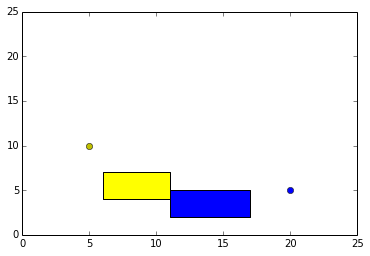

In [158]:
Yellow1 = ((6,7), (11,4))
Blue1 = ((11,5),(17,2))
plot_pic(Yellow1, Blue1)

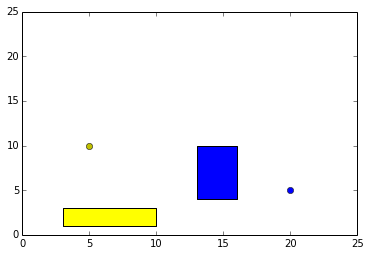

In [159]:
Yellow2 = ((3,3), (10,1))
Blue2 = ((13,10),(16,4))
plot_pic(Yellow2, Blue2)

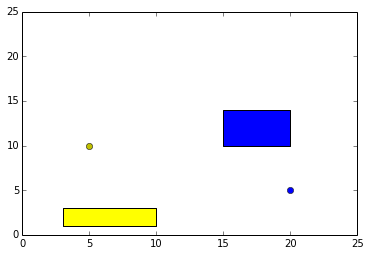

In [160]:
Yellow3 = ((3,3), (10,1))
Blue3 = ((15,14),(20,10))
plot_pic(Yellow3, Blue3)